In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house_price = pd.read_csv("D:/DA2210R1/data/house_price_Dống-Da_Hà-Nội_subdata.csv")

In [3]:
house_price.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


### Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.

In [10]:
data1 = house_price[["area", "price"]]
data1 = data1.dropna()

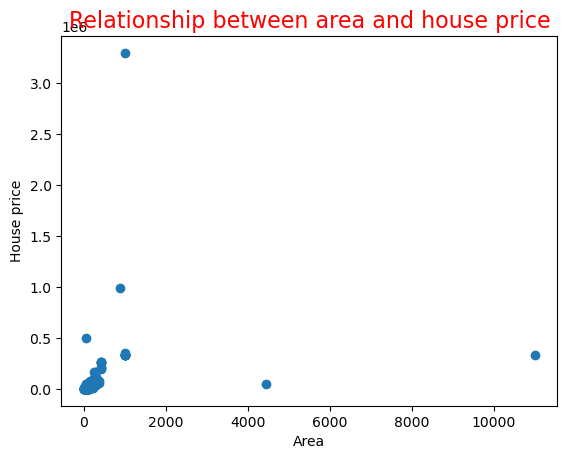

In [11]:
plt.scatter(data1["area"], data1["price"])
plt.title("Relationship between area and house price", fontsize = 16, color = "r")
plt.xlabel("Area")
plt.ylabel("House price")
plt.show()

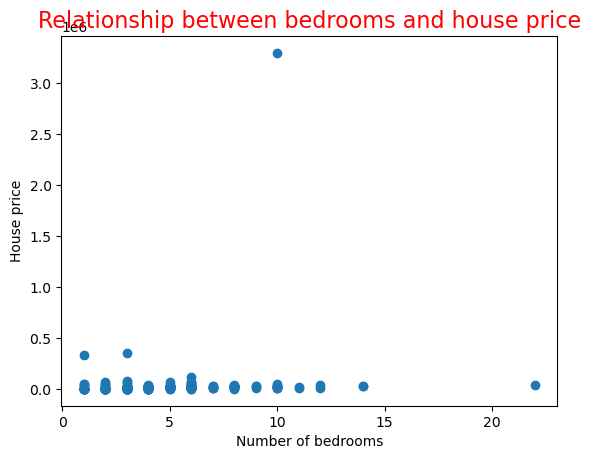

In [12]:
data2 = house_price[["bedroom", "price"]]
data2 = data2.dropna()
plt.scatter(data2["bedroom"], data2["price"])
plt.title("Relationship between bedrooms and house price", fontsize = 16, color = "r")
plt.xlabel("Number of bedrooms")
plt.ylabel("House price")
plt.show()

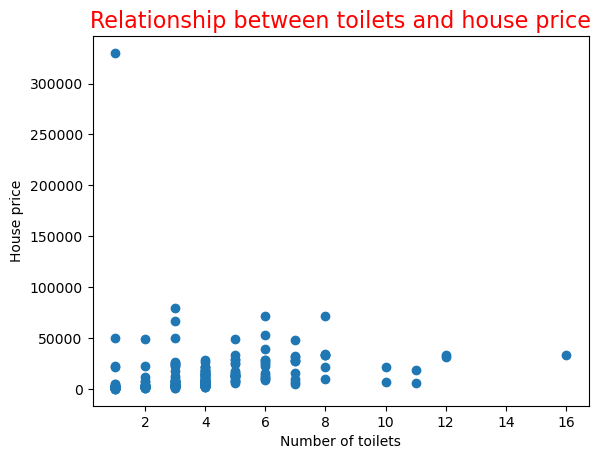

In [14]:
data3 = house_price[["toilet", "price"]]
data3 = data3.dropna()
plt.scatter(data3["toilet"], data3["price"])
plt.title("Relationship between toilets and house price", fontsize = 16, color = "r")
plt.xlabel("Number of toilets")
plt.ylabel("House price")
plt.show()

### Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).

In [35]:
data4 = house_price[["area", "price", "property_type"]]
data4 = data4.dropna()

In [49]:
Q1 = data4.quantile(0.25)
Q3 = data4.quantile(0.75)
IQR = Q3 - Q1
data4 = data4[~((data4 < (Q1 - 1.5*IQR)) | (data4 > (Q3 + 1.5*IQR))).any(axis=1)]

C:\Users\Luan Vo\AppData\Local\Temp\ipykernel_7308\2974750480.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data4 = data4[~((data4 < (Q1 - 1.5*IQR)) | (data4 > (Q3 + 1.5*IQR))).any(axis=1)]


In [52]:
data4["price/m2"] = data4["price"] / data4["area"]
type_of_land = data4.groupby("property_type")["price/m2"].mean()

C:\Users\Luan Vo\AppData\Local\Temp\ipykernel_7308\1384722823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["price/m2"] = data4["price"] / data4["area"]


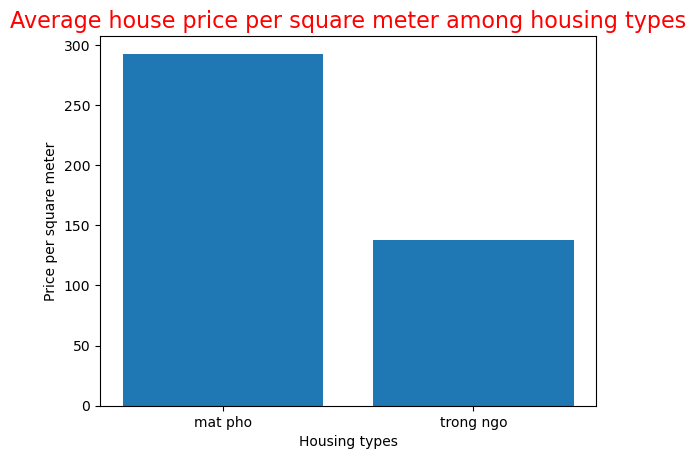

In [53]:
plt.bar(type_of_land.index, type_of_land.values)
plt.title("Average house price per square meter among housing types", fontsize = 16, color = "r")
plt.xlabel("Housing types")
plt.ylabel("Price per square meter")
plt.show()

### Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

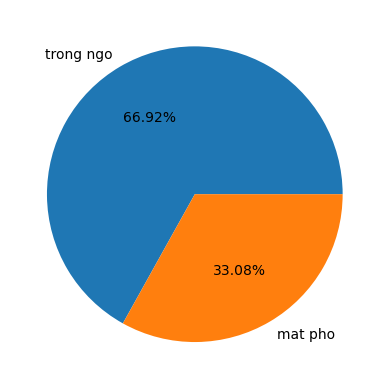

In [55]:
data5 = house_price["property_type"].value_counts()
plt.pie(data5.values, labels = data5.index, autopct="%1.2f%%")
plt.show()

### Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.

In [56]:
data6 = house_price[["area", "price","bedroom", "property_type"]]
data6 = data6.dropna()
Q1 = data6.quantile(0.25)
Q3 = data6.quantile(0.75)
IQR = Q3 - Q1
data6 = data6[~((data6 < (Q1 - 1.5*IQR)) | (data6 > (Q3 + 1.5*IQR))).any(axis=1)]

C:\Users\Luan Vo\AppData\Local\Temp\ipykernel_7308\513219591.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data6 = data6[~((data6 < (Q1 - 1.5*IQR)) | (data6 > (Q3 + 1.5*IQR))).any(axis=1)]


In [58]:
data6["price/m2"] = data6["price"] / data6["area"]
data6

C:\Users\Luan Vo\AppData\Local\Temp\ipykernel_7308\939725377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6["price/m2"] = data6["price"] / data6["area"]


,area,price,bedroom,property_type,price/m2
0,50.0,14700.0,6.0,trong ngo,294.000000
1,57.0,4200.0,8.0,trong ngo,73.684211
2,62.0,11000.0,5.0,trong ngo,177.419355
3,26.0,2900.0,3.0,trong ngo,111.538462
5,41.0,8900.0,3.0,trong ngo,217.073171
...,...,...,...,...,...
653,45.0,30000.0,5.0,mat pho,666.666667
658,65.0,30000.0,6.0,mat pho,461.538462
659,45.0,12000.0,4.0,mat pho,266.666667
661,50.0,14500.0,6.0,mat pho,290.000000


In [60]:
data7 = pd.pivot_table(data6, values = "price/m2", index = "bedroom")

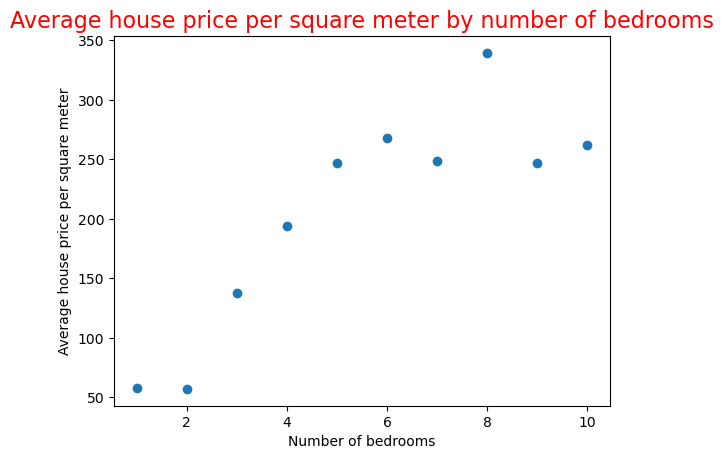

In [62]:
plt.scatter(data7.index, data7.values)
plt.title("Average house price per square meter by number of bedrooms", fontsize = 16, color = "r")
plt.xlabel("Number of bedrooms")
plt.ylabel("Average house price per square meter")
plt.show()